In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd

In [2]:
import glob
image_list = []
data =[]
for i in range(1,41):
    for img in glob.glob("att_faces/s"+str(i)+"/*.pgm"):
        pic =cv2.imread(img, 1).astype(np.uint8)
        pic = pic/255
        pic = pic[:,:, 1]
#         plt.imshow(im)
        data.append(list((pic, i)))

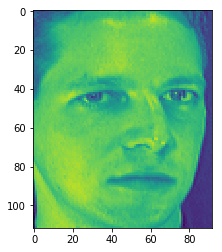

In [3]:
data = pd.DataFrame(data,columns=['Image','Label'])
plt.imshow(data['Image'][2])
plt.show()


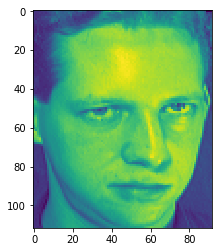

In [4]:
plt.imshow(data['Image'][1])
plt.show()

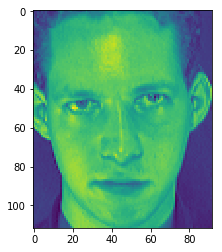

In [5]:
plt.imshow(data['Image'][3])


In [6]:
final_count=len(data['Image'])
for i in range(final_count):
    data['Image'][i] = data['Image'][i].flatten()

C:\Users\pranava\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
training_images=[]
testing_images=[]
training_label=[]
testing_label=[]
flag=[10*i for i in range(1,41) ]
for i in range(0,400):
    if(i>0  and (i+1 in  flag)):
        testing_images.append(data['Image'][i])
        testing_label.append(data['Label'][i])
    else:
        training_images.append(data['Image'][i])
        training_label.append(data['Label'][i])

In [31]:
train_vector = []
for i in training_images:
    train_vector.append(i.tolist())
testing_images_vectors = []
for j in testing_images:
    testing_images_vectors.append(j.tolist())

In [32]:
len(train_vector)

360

In [33]:
for i in range(360):
    for j in range(10304):
        train_vector[i][j]=np.asscalar(np.asarray(train_vector[i][j]))
for i in range(40):
    for j in range(10304):
        testing_images_vectors[i][j]=np.asscalar(np.asarray(testing_images_vectors[i][j]))

In [34]:
result = np.matrix(train_vector)
print(result)

[[0.18823529 0.19215686 0.17647059 ... 0.18431373 0.18039216 0.18039216]
 [0.13333333 0.13333333 0.12941176 ... 0.14509804 0.15686275 0.12941176]
 [0.23529412 0.23529412 0.24313725 ... 0.1254902  0.13333333 0.13333333]
 ...
 [0.48235294 0.4745098  0.49411765 ... 0.15686275 0.1372549  0.16470588]
 [0.50588235 0.49803922 0.52156863 ... 0.36470588 0.36470588 0.36470588]
 [0.49019608 0.46666667 0.48627451 ... 0.14117647 0.15294118 0.15686275]]


In [35]:
from sklearn import decomposition
pca = decomposition.PCA(.97)
pca.fit(result)

PCA(copy=True, iterated_power='auto', n_components=0.97, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [36]:
training_images = pca.transform(np.asmatrix(train_vector,dtype='float64'))
testing_images = pca.transform(np.asmatrix(testing_images_vectors,dtype='float64'))

In [37]:
training_images.shape,testing_images.shape


((360, 223), (40, 223))

In [38]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs',multi_class='multinomial')
logisticRegr.fit(training_images, training_label)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
logisticRegr.predict(testing_images[:])


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 11, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39,  5], dtype=int64)

In [40]:
logisticRegr.score(testing_images[:], testing_label)


0.95

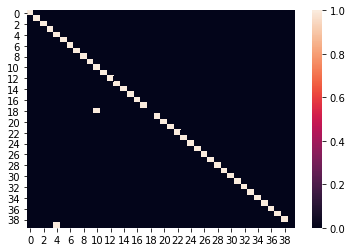

In [41]:
from sklearn import metrics
import seaborn as sns
from sklearn.linear_model import LogisticRegression

sns.heatmap(metrics.confusion_matrix(testing_label,logisticRegr.predict(testing_images)))

In [42]:
list_files =[]
for i in range(1,41):
    list_files.append("s"+str(i))

In [43]:
print(metrics.classification_report(testing_label,logisticRegr.predict(testing_images[:]),target_names = list_files ))

             precision    recall  f1-score   support

         s1       1.00      1.00      1.00         1
         s2       1.00      1.00      1.00         1
         s3       1.00      1.00      1.00         1
         s4       1.00      1.00      1.00         1
         s5       0.50      1.00      0.67         1
         s6       1.00      1.00      1.00         1
         s7       1.00      1.00      1.00         1
         s8       1.00      1.00      1.00         1
         s9       1.00      1.00      1.00         1
        s10       1.00      1.00      1.00         1
        s11       0.50      1.00      0.67         1
        s12       1.00      1.00      1.00         1
        s13       1.00      1.00      1.00         1
        s14       1.00      1.00      1.00         1
        s15       1.00      1.00      1.00         1
        s16       1.00      1.00      1.00         1
        s17       1.00      1.00      1.00         1
        s18       1.00      1.00      1.00   

C:\Users\pranava\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
